# Neste notebook vamos simular a interconexão entre SLITs

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf
# Os próximos módulos são usados pra criar nosso SLIT
from scipy.signal import butter, lfilter, freqz, chirp, impulse

# Vamos criar 2 SLITs

Primeiro vamos criar dois SLITs. Um filtro passa alta e um passa-baixa. Você pode depois mudar a ordem de um dos filtros e sua frequência de corte e, então, observar o que acontece na FRF do SLIT concatenado.

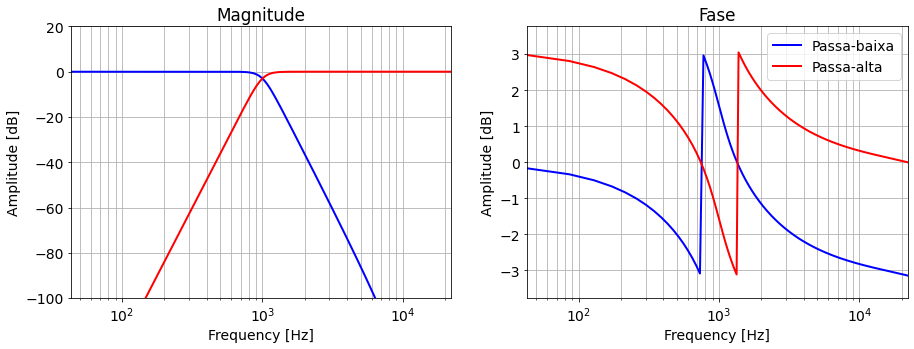

In [2]:
# Variáveis do filtro
order1 = 6
fs = 44100       # sample rate, Hz
cutoff1 = 1000    # desired cutoff frequency of the filter, Hz

# Passa baixa
b, a = butter(order1, 2*cutoff1/fs, btype='low', analog=False)
w, H1 = freqz(b, a)

# Passa alta
cutoff2 = 1000
order2 = 6
b, a = butter(order2, 2*cutoff2/fs, btype='high', analog=False)
w, H2 = freqz(b, a)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H1)), 'b', linewidth = 2, label = 'Passa-baixa')
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H2)), 'r', linewidth = 2, label = 'Passa-alta')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim((-100, 20))

plt.subplot(1,2,2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H1), 'b', linewidth = 2, label = 'Passa-baixa')
plt.semilogx(fs*w/(2*np.pi), np.angle(H2), 'r', linewidth = 2, label = 'Passa-alta')
plt.legend(loc = 'upper right')
plt.title('Fase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

# Interconexão em série

\begin{equation}
H(\mathrm{j}\omega) = H_1(\mathrm{j}\omega)H_2(\mathrm{j}\omega)
\end{equation}

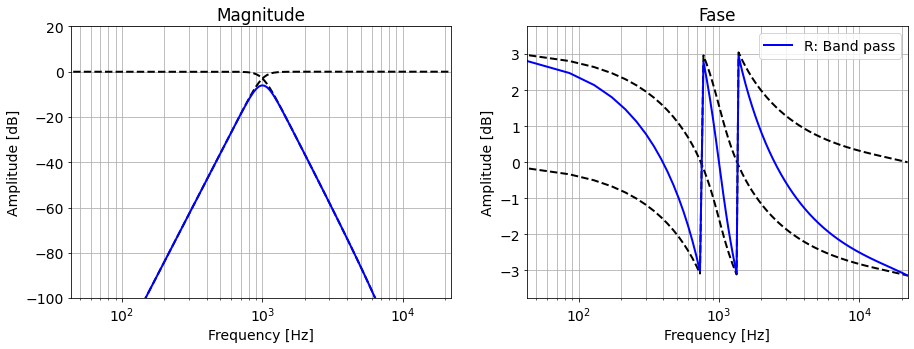

In [3]:
Hs = H1*H2

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H1)), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H2)), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(Hs)), 'b', linewidth = 2, label = 'R: Band pass')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim((-100, 20))

plt.subplot(1,2,2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H1), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H2), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), np.angle(Hs), 'b', linewidth = 2, label = 'R: Band pass')
plt.legend(loc = 'upper right')
plt.title('Fase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


# Interconexão em paralelo

\begin{equation}
H(\mathrm{j}\omega) = H_1(\mathrm{j}\omega)+H_2(\mathrm{j}\omega)
\end{equation}

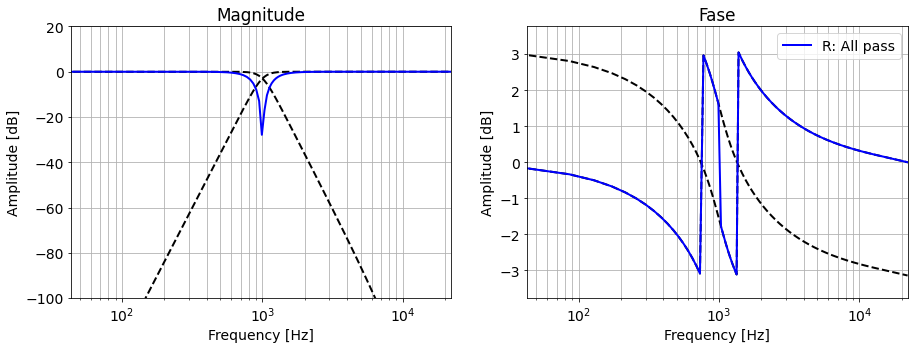

In [4]:
Hs = H1+H2

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H1)), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H2)), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(Hs)), 'b', linewidth = 2, label = 'R: All pass')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim((-100, 20))

plt.subplot(1,2,2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H1), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H2), '--k', linewidth = 2)
plt.semilogx(fs*w/(2*np.pi), np.angle(Hs), 'b', linewidth = 2, label = 'R: All pass')
plt.legend(loc = 'upper right')
plt.title('Fase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()